In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.grid_search import GridSearchCV
from sklearn.cluster import KMeans
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from wordcloud import wordcloud
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

In [7]:
#Unpickling
import pickle

filename='X_kmeans'
infile = open(filename,'rb')
X_kmeans=pickle.load(infile)
infile.close()
X_train_2=X_kmeans.tolist()

filename='X_kmeans_BOW'
infile = open(filename,'rb')
X_kmenas_BOW=pickle.load(infile)
infile.close()

filename='X_kmeans_tf_idf'
infile = open(filename,'rb')
X_kmeans_tf_idf=pickle.load(infile)
infile.close()

infile = open('Train_TF-IDF','rb')
X_train_tfidf=pickle.load(infile)
infile.close()

filename='sent_vectors_AvgW2V_kmeans'
infile = open(filename,'rb')
X_kmeans_AvgW2V=pickle.load(infile)
infile.close()

filename='tfidfW2V_sent_vectors_kmeans'
infile = open(filename,'rb')
X_kmeans_tfidfW2V=pickle.load(infile)
infile.close()

In [81]:
def wordclouds(string):   
    words = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    max_words=2000, 
                    min_font_size = 10)
    wc=words.generate(string)    
    return wc

def Print_clusters(model):
    
    #Picking top 5 clusters for wordcloud
    unique, counts = np.unique(model.labels_, return_counts=True)
    a=sorted(dict(zip(unique, counts)).items(), key=lambda x: x[1],reverse=True)
    clusters= [i[0] for i in a[0:5]]
    
    #ploting top 5 clusters
    fig = plt.figure(figsize = (20,20))
    count = 1
    for i in clusters:
        str1=""
        #print("Cluster:%d" %i)
        for j in np.where(model.labels_ == i)[0]:
            str1+=X_train_2[j]
            str1+=" "
        word=wordclouds(str1)
        fig.add_subplot(4,4,count)
        plt.imshow(word) 
        plt.axis("off") 
        plt.tight_layout(pad = 0) 
        plt.title("Cluster:%d" %i)
        count+=1
    plt.show() 
    print ("\n") 

# BOW


The optimal cluster is : 50


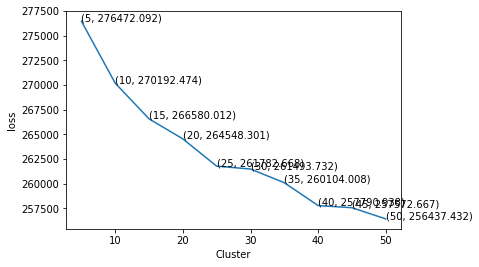

('the loss  for each cluster value is : ', array([276472.092, 270192.474, 266580.012, 264548.301, 261782.668,
       261493.732, 260104.008, 257790.938, 257572.667, 256437.432]))


In [6]:
#Finding Optimal Number of clusters

n_clusters = range(5,51,5)

    # empty list that will hold cv scores
cv_scores = []

    # perform 10-fold cross validation
for cluster in n_clusters:
    kmeans =KMeans(init='k-means++',random_state=0,n_clusters=cluster)
    scores = cross_val_score(kmeans, X_kmenas_BOW, cv=5,n_jobs=-1)
    cv_scores.append(scores.mean())

    # changing to misclassification error
MSE = [1 - x for x in cv_scores]

    # determining best max_depth
optimal_cluster = n_clusters[MSE.index(min(MSE))]

print('\nThe optimal cluster is : {}'.format(optimal_cluster))
# plot misclassification error vs depth 
plt.plot(n_clusters, MSE)

for xy in zip(n_clusters, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Cluster')
plt.ylabel('loss')
plt.show()
print("the loss  for each cluster value is : ", np.round(MSE,3)) 

In [7]:
model=KMeans(init='k-means++',random_state=0,n_clusters=optimal_cluster,n_jobs=-1).fit(X_kmenas_BOW)

In [18]:
import pickle
filename='model_bow_kmeans'
outfile=open(filename,'wb')
pickle.dump(model, outfile)
outfile.close()

In [52]:
#No.of reviews in each cluster
unique, counts = np.unique(model.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 3,
 1: 2385,
 2: 761,
 3: 994,
 4: 9,
 5: 51,
 6: 205,
 7: 8,
 8: 2,
 9: 171,
 10: 249,
 11: 67,
 12: 2894,
 13: 1,
 14: 109,
 15: 1132,
 16: 409,
 17: 115,
 18: 302,
 19: 96,
 20: 3,
 21: 1,
 22: 6351,
 23: 343,
 24: 69,
 25: 1,
 26: 1071,
 27: 99,
 28: 1,
 29: 903,
 30: 1,
 31: 27,
 32: 7,
 33: 6,
 34: 1,
 35: 3,
 36: 362,
 37: 8,
 38: 1,
 39: 3,
 40: 1,
 41: 933,
 42: 102,
 43: 1,
 44: 1,
 45: 346,
 46: 36,
 47: 1060,
 48: 832,
 49: 2464}

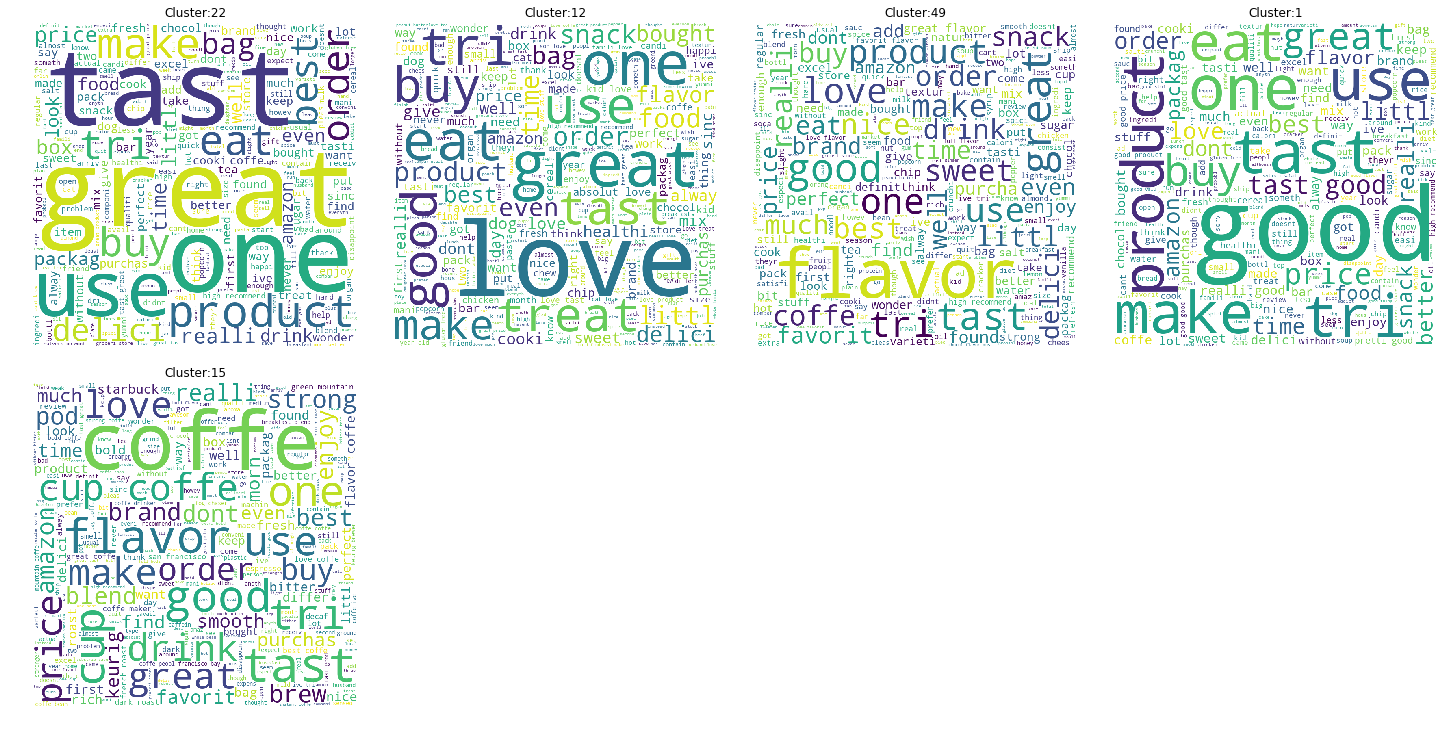

In [82]:
#Reading clusters form WOrdcloud
Print_clusters(model)

Here the top 5 cluster reviews are related to Expreince,taste of products(may be grocessories),snacks(food products may be), Coffee.

# TFIDF


The optimal cluster is : 50


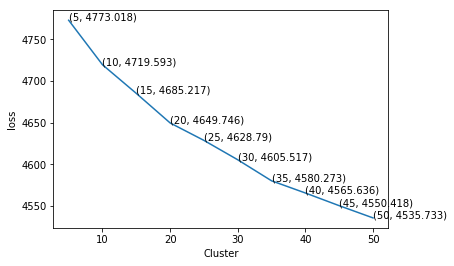

('the loss  for each cluster value is : ', array([4773.018, 4719.593, 4685.217, 4649.746, 4628.79 , 4605.517,
       4580.273, 4565.636, 4550.418, 4535.733]))


In [21]:
#Finding Optimal Number of clusters
n_clusters = range(5,51,5)

    # empty list that will hold cv scores
cv_scores = []

    # perform 10-fold cross validation
for cluster in n_clusters:
    kmeans =KMeans(init='k-means++',random_state=0,n_clusters=cluster,n_jobs=-1)
    scores = cross_val_score(kmeans, X_kmeans_tf_idf, cv=5)
    cv_scores.append(scores.mean())

    # changing to misclassification error
MSE = [1 - x for x in cv_scores]

    # determining best max_depth
optimal_cluster = n_clusters[MSE.index(min(MSE))]

print('\nThe optimal cluster is : {}'.format(optimal_cluster))
# plot misclassification error vs depth 
plt.plot(n_clusters, MSE)

for xy in zip(n_clusters, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Cluster')
plt.ylabel('loss')
plt.show()
print("the loss  for each cluster value is : ", np.round(MSE,3)) 

In [22]:
#Number of reviews in each cluster
model2=KMeans(init='k-means++',random_state=0,n_clusters=optimal_cluster,n_jobs=-1).fit(X_kmeans_tf_idf)
unique, counts = np.unique(model2.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 1294,
 1: 512,
 2: 427,
 3: 345,
 4: 959,
 5: 916,
 6: 427,
 7: 348,
 8: 727,
 9: 147,
 10: 963,
 11: 4363,
 12: 758,
 13: 274,
 14: 316,
 15: 529,
 16: 714,
 17: 545,
 18: 146,
 19: 210,
 20: 546,
 21: 130,
 22: 513,
 23: 335,
 24: 507,
 25: 496,
 26: 464,
 27: 453,
 28: 335,
 29: 545,
 30: 181,
 31: 301,
 32: 191,
 33: 249,
 34: 632,
 35: 323,
 36: 216,
 37: 95,
 38: 165,
 39: 488,
 40: 248,
 41: 134,
 42: 458,
 43: 526,
 44: 61,
 45: 225,
 46: 194,
 47: 559,
 48: 258,
 49: 252}

In [23]:
import pickle
filename='model_tfidf_kmeans'
outfile=open(filename,'wb')
pickle.dump(model2, outfile)
outfile.close()

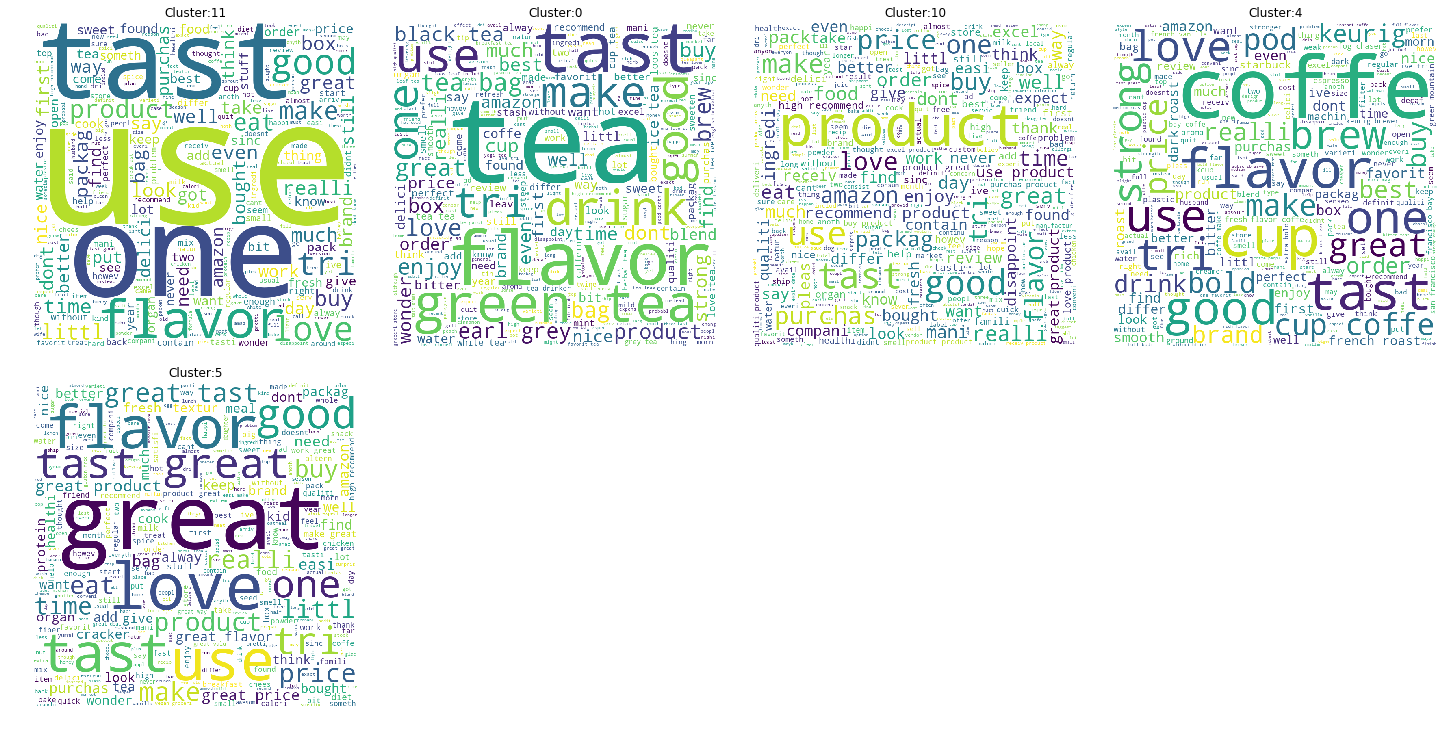

In [83]:
#Reading Top 5 clusters form WOrdcloud
Print_clusters(model2)

Here top 5 cluster reviews are related to taste&flavours of food(may be) products,Different types of tea,Expreince of online purchase,Coffee,expreince of purchasing online food products(maybe) respectively.

# AVGW2V


The optimal cluster is : 50


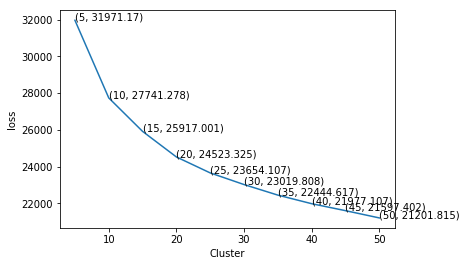

('the loss  for each cluster value is : ', array([31971.17 , 27741.278, 25917.001, 24523.325, 23654.107, 23019.808,
       22444.617, 21977.107, 21597.402, 21201.815]))


In [28]:
#FInding Optimal number of clusters
n_clusters = range(5,51,5)

    # empty list that will hold cv scores
cv_scores = []

    # perform 10-fold cross validation
for cluster in n_clusters:
    kmeans =KMeans(init='k-means++',random_state=0,n_clusters=cluster,n_jobs=-1)
    scores = cross_val_score(kmeans, X_kmeans_AvgW2V, cv=3)
    cv_scores.append(scores.mean())

    # changing to misclassification error
MSE = [1 - x for x in cv_scores]

    # determining best max_depth
optimal_cluster = n_clusters[MSE.index(min(MSE))]

print('\nThe optimal cluster is : {}'.format(optimal_cluster))
# plot misclassification error vs depth 
plt.plot(n_clusters, MSE)

for xy in zip(n_clusters, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Cluster')
plt.ylabel('loss')
plt.show()
print("the loss  for each cluster value is : ", np.round(MSE,3)) 

In [29]:
#Number of reivews in each cluster
model3=KMeans(init='k-means++',random_state=0,n_clusters=optimal_cluster,n_jobs=-1).fit(X_kmeans_AvgW2V)
unique, counts = np.unique(model3.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 427,
 1: 625,
 2: 740,
 3: 307,
 4: 387,
 5: 638,
 6: 838,
 7: 364,
 8: 791,
 9: 469,
 10: 798,
 11: 466,
 12: 334,
 13: 627,
 14: 300,
 15: 408,
 16: 484,
 17: 452,
 18: 360,
 19: 329,
 20: 498,
 21: 648,
 22: 456,
 23: 385,
 24: 677,
 25: 444,
 26: 572,
 27: 671,
 28: 357,
 29: 199,
 30: 357,
 31: 490,
 32: 665,
 33: 393,
 34: 409,
 35: 140,
 36: 566,
 37: 526,
 38: 393,
 39: 557,
 40: 492,
 41: 518,
 42: 621,
 43: 360,
 44: 384,
 45: 777,
 46: 665,
 47: 541,
 48: 474,
 49: 621}

In [30]:
import pickle
filename='model_avgw2v_kmeans'
outfile=open(filename,'wb')
pickle.dump(model3, outfile)
outfile.close()

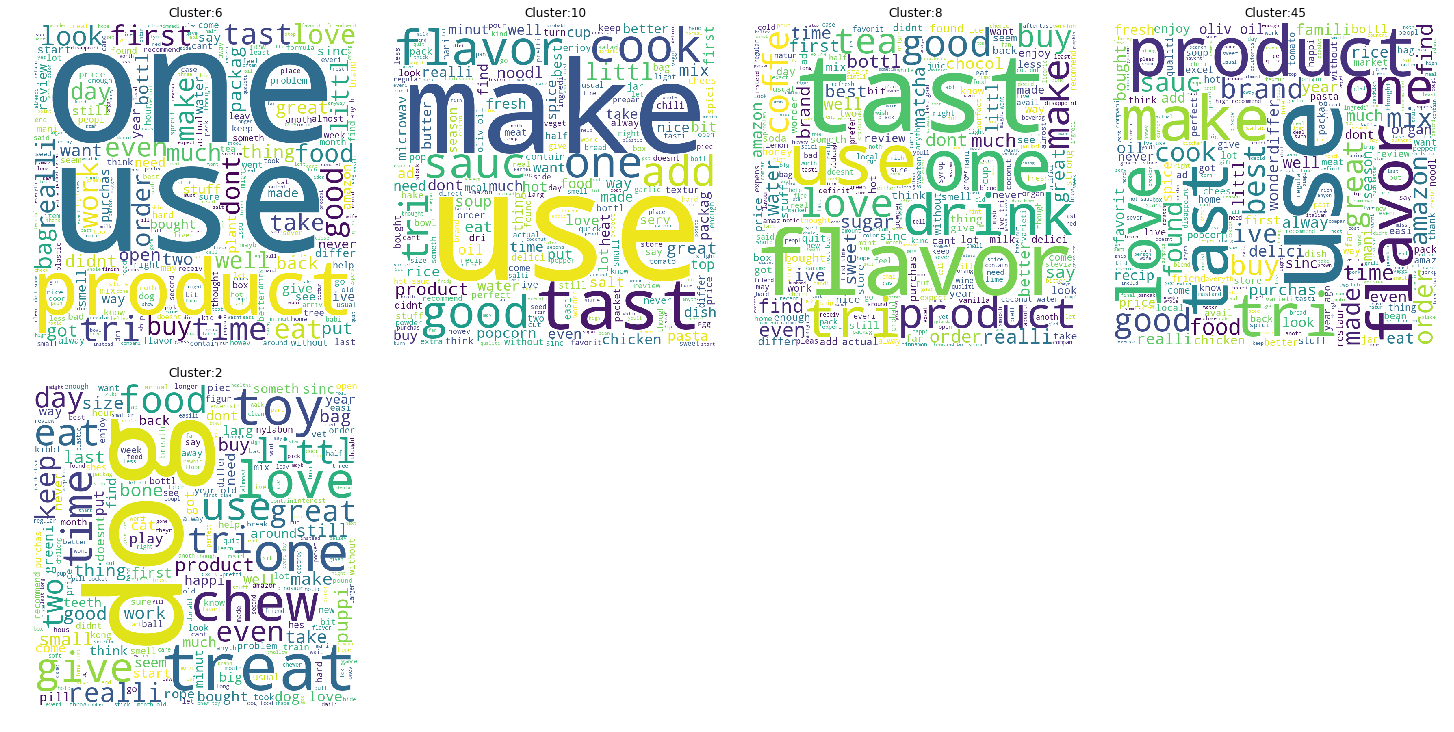

In [88]:
#Reading clusters form WOrdcloud
Print_clusters(model3)

Here the top 5 cluster reviews are related to Expreince on online purchases and products,food products,drink(may be tea and others),some groceesory products,animal related products respectively.

# TFIDF-W2V


The optimal cluster is : 50


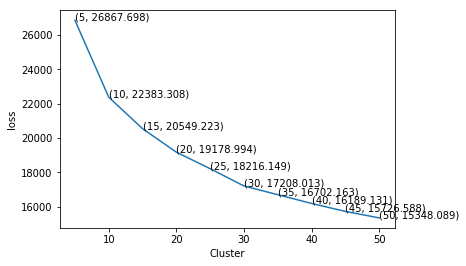

('the loss  for each cluster value is : ', array([26867.698, 22383.308, 20549.223, 19178.994, 18216.149, 17208.013,
       16702.163, 16189.131, 15726.588, 15348.089]))


In [31]:
#Finding optimal number of clusters
n_clusters = range(5,51,5)

    # empty list that will hold cv scores
cv_scores = []

    # perform 10-fold cross validation
for cluster in n_clusters:
    kmeans =KMeans(init='k-means++',random_state=0,n_clusters=cluster,n_jobs=-1)
    scores = cross_val_score(kmeans, X_kmeans_tfidfW2V, cv=5)
    cv_scores.append(scores.mean())

    # changing to misclassification error
MSE = [1 - x for x in cv_scores]

    # determining best max_depth
optimal_cluster = n_clusters[MSE.index(min(MSE))]

print('\nThe optimal cluster is : {}'.format(optimal_cluster))
# plot misclassification error vs depth 
plt.plot(n_clusters, MSE)

for xy in zip(n_clusters, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Cluster')
plt.ylabel('loss')
plt.show()
print("the loss  for each cluster value is : ", np.round(MSE,3)) 

In [32]:
#Number of reviews in each cluster
model4=KMeans(init='k-means++',random_state=0,n_clusters=optimal_cluster,n_jobs=-1).fit(X_kmeans_tfidfW2V)
unique, counts = np.unique(model4.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 991,
 1: 458,
 2: 258,
 3: 450,
 4: 633,
 5: 776,
 6: 194,
 7: 149,
 8: 988,
 9: 614,
 10: 236,
 11: 450,
 12: 582,
 13: 347,
 14: 233,
 15: 567,
 16: 305,
 17: 118,
 18: 143,
 19: 561,
 20: 229,
 21: 1005,
 22: 574,
 23: 375,
 24: 1233,
 25: 1312,
 26: 783,
 27: 396,
 28: 290,
 29: 518,
 30: 738,
 31: 549,
 32: 282,
 33: 393,
 34: 743,
 35: 553,
 36: 314,
 37: 896,
 38: 134,
 39: 242,
 40: 498,
 41: 504,
 42: 194,
 43: 257,
 44: 647,
 45: 957,
 46: 204,
 47: 131,
 48: 346,
 49: 650}

In [33]:
import pickle
filename='model_tfidfw2v_kmeans'
outfile=open(filename,'wb')
pickle.dump(model4, outfile)
outfile.close()

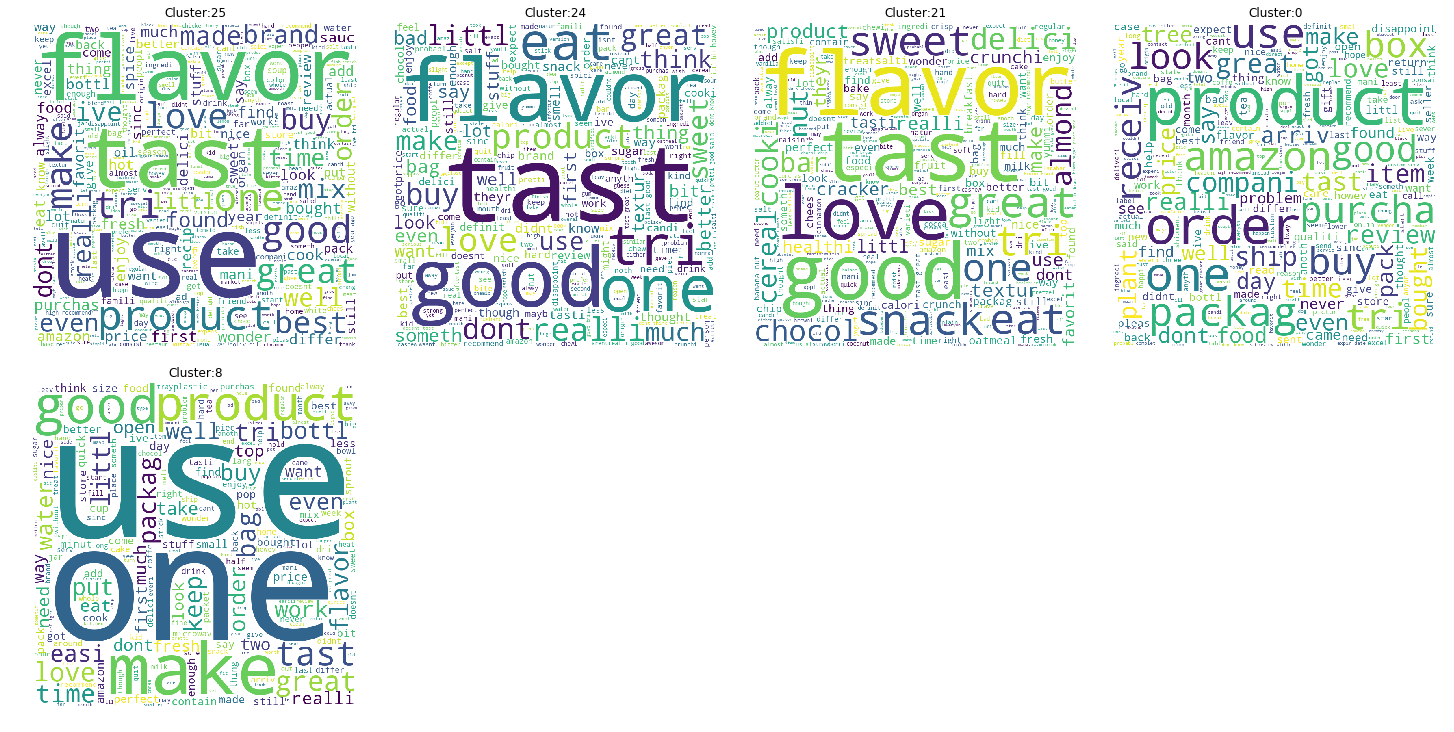

In [85]:
#Reading clusters form WOrdcloud
Print_clusters(model4)

Here top 5 cluster reviews are related to taste and flavours of products(may be grocessories),food products,user expreinces on delivery.

# Conclusion

On comparing the  wodclouds of different models, it is observed that reviews are clustered better with TFIDF model as there are more clear seperation between the cluster reviews than compared to other models.